In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

In [7]:
plt.style.use('seaborn-poster')

## Pregunta 1 ##

Encontrar una raiz entre 4 y 5 para la función $cosh(x)cos(x)-1$ usando el método de Ridder. Primero definimos la función $f(x)=cosh(x)cos(x)-1$

In [4]:
def f(x):
    return np.cosh(x)*np.cos(x)-1

In [89]:
def Ridder(x1,x2,f,maxiter=100,epsilon=1.0e-9,vector=[]):
    xold=0.0
    for i in range(maxiter):
        x3=(x1+x2)/2
        f1=f(x1)
        f2=f(x2)
        f3=f(x3)
        aux=np.power(f(x3),2)
        raiz=np.sqrt(aux-f1*f2)
        if (raiz==0): return 0.0
        dx=(x3-x1)*f3/raiz
        if (f1-f2<0):
            dx=-dx
        x=x3+dx
        fx=f(x)
        vector.append(x)
        #Depende del valor de x4 para ver si va por un intervalo u otro
        # Si f3 y f4 tienen distinto signo entonces, estos son los nuevos limites a buscar la raiz
        if (i>0):
            if abs(x-xold)<epsilon*max(abs(x),1.0):
                return (x)
            xold=x
        if(f3*fx<0):
            x1=x3
            x2=x
        else:
            # Si f1 y f4 son distintos signo, entonces f1 se mantiene igual y f4 es el nuevo x2
            if(f1*fx<0):
                x2=x
            # Si f2 y f4 tienen distinto signo entonces x4 es el nuevo x1, y f2 se  mantiene
            elif(f2*fx<0):
                x1=x
    print ("Demasiadas iteraciones")
    return xold

Ahora compararamos el menor valor con un valor mayor de iteraciones, y comparamos estos valores.

In [95]:
raiz=Ridder(4,5,f,maxiter=5)
raiz2=Ridder(4,5,f,maxiter=500)
print(raiz-raiz2)
print(raiz,raiz2)

0.0
4.7300407448627055 4.7300407448627055


Como se puede ver la diferencia entre los dos valores si hay 5 iteraciones (el minimo posible) comparado con 500 iteraciones, no hay diferencia alguna entre los dos valores.

Si lo hacemos con el método de Ridder implementado en la maquina, y comparando ahora de 6 (el minimo de este metodo) a 500 iteraciones, obtenemos que:

In [8]:
from scipy import optimize

In [90]:
root = optimize.ridder(f, 4, 5,maxiter=6)
root2= optimize.ridder(f, 4, 5,maxiter=500)
print(root,root2)
print(root-root2)

4.730040744861702 4.730040744861702
0.0


#### Ahora graficando la raiz obtenida por el método de Ridder a traves de diversas iteraciones. ####

Text(0.5, 1.0, 'Valor de la Raiz entre 4 y 5 de acuerdo a la cantidad de iteraciones')

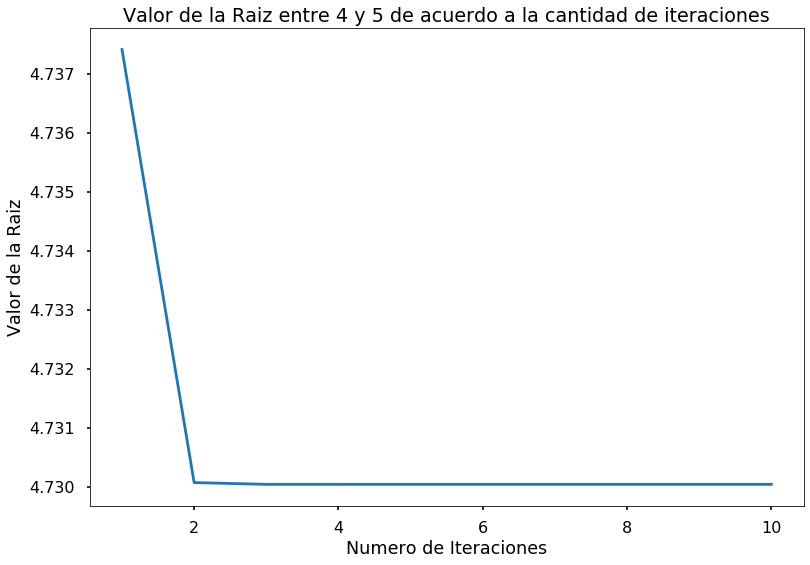

In [103]:
iteracion3=[]
vector2=np.linspace(1,10,10)
Ridder(4,5,f,vector=iteracion3)
for i in range(5,10):
    iteracion3.append(Ridder(4,5,f,maxiter=i))
    

plt.plot(vector2,iteracion3)
plt.xlabel("Numero de Iteraciones")
plt.ylabel("Valor de la Raiz")
plt.title("Valor de la Raiz entre 4 y 5 de acuerdo a la cantidad de iteraciones")

Se puede ver que el método de Ridder converge muy rápido con solo 5 iteraciones, y que su valor cambia drasticamente entre estas primeras iteraciones hasta converger a un valor estable, de hecho el valor ya converge con 2 iteraciones. Por lo que se puede decir que es un método muy rápido y estable.

## Pregunta 2 ##

#### Ecuacion de x ####

Tenemos los siguientes valores: si tomamos la posicion donde se parte como $(0,0)$ con $x_0=0$ e $y_0=0$.
Dividimos las posiciones en dos cordinadas en $x$ e $y$. Para la posicion en $x$ se define de la siguiente forma:
               $$x=x_0+v_xt$$

Definimos $v_x=vcos(\theta)$ e $v_y=vsen(\theta)$. Entonces si reemplazamos $v_x$ y $x_0$ en la ecuacion anterior, se tiene que:
                $$x=vcos(\theta)t$$

Si despejamos $t$, obtenemos que:
                $$t=\frac{x}{vcos(\theta)}$$

#### Ecuacion de y ####

Usando la ecuacion de movimiento uniforme vertical, tenemos lo siguiente:
            $$y=y_o+v_yt-\frac{1}{2}gt^{2}$$

Reemplazando $y_0=0$ y $v_y=vsen(\theta)$, tenemos la siguiente ecuación:
                $$y=vsen(\theta)t-\frac{1}{2}gt^{2}$$

Reemplazamos el $t$ que obtuvimos antes en la ecuacion de $x$.
            $$y=vsen(\theta)(\frac{x}{vcos(\theta)})-\frac{1}{2}g(\frac{x}{vcos(\theta)})^{2}$$

Factorizamos con el x y ordenamos:
            $$y=x(tan(\theta)-\frac{xg}{2v^{2}cos(\theta)^{2}})\label{eq1}\tag{1}$$

Nuevamente si tomamos que $y$ es la posicion final, entonces reemplazamos con $y=61$ y con $x=300$ en la ecuación, y se tiene que:
                $$61=300(tan(\theta)-\frac{300g}{2v^2cos(\theta)^2})$$
                
Que corresponde a la primera ecuación.

#### Ecuacion de velocidad ####

Para obtener la velocidad lo podemos interpretar como la variacion de $y$ respecto a $x$, esto se puede interpretar como que $v$ es la tangente de un ángulo $\alpha$, que correspondería a la variación del ángulo sobre el trayecto. Este $\alpha$ corresponderia inicialmente a $\theta$.
                $$v_{total}=\frac{v_y}{v_x}=tan(\alpha)$$

Tenemos que $v_x=vcos(\theta)$ y $v_y=vsen(\theta)-gt$, reemplazamos y obtenemos que:
            $$tan(\alpha)=\frac{vsen(\theta)-gt}{vcos(\theta)}=tan(\theta)-\frac{gt}{vcos(\theta)}$$

Si reemplazamos $t$ con el valor que se encontró antes se obtiene que:
            $$tan(\alpha)=tan(\theta)-\frac{g(\frac{x}{vcos(\theta)})}{v\cos(\theta)}$$

Reemplazamos $x=300$ y consideramos $\alpha$ el ángulo final que se obtiene:
                $$tan(\alpha_{final})=\tan(\theta)-\frac{300g}{v^2cos^2(\theta)}$$

Se concluye que este ángulo $\alpha_{final}$ es el suplemento del ángulo $45°$ que vimos en la posicion A
            $$tan(\alpha_{final})=tan(180-45)$$

Reemplazando todo se tiene que:
                    $$-1=tan(\theta)-\frac{300g}{v^2cos^2(\theta)}\label{eq2}\tag{2}$$
Obteniendo la segunda ecuación.

In [10]:
from numpy.linalg import *

In [31]:
def jacobiano(f,x):
    h=1.0e-9
    jac=np.zeros((2,2))
    f0=f(x)    
    for i in range(2):
        temp=x[i]
        x[i]=temp+h
        f1=f(x)
        x[i]=temp
        jac[:,i]=(f1-f0)/h
    return f0,jac

In [38]:
def newtonRaphson(f,x,epsilon=1.0e-9,maxiter=30):
    for i in range(maxiter):
        f0,jac=jacobiano(f,x)
        if (np.sqrt(np.dot(f0,f0))/len(x))< epsilon:
            return x
        dx=linalg.solve(jac,-f0)
        x=x+dx
        if np.sqrt(np.dot(dx,dx)) < epsilon*max(max(abs(x)),1.0):
            return x
    print("Demasiadas Iteraciones")

In [27]:
def f(x):
    f = np.zeros(len(x))
    g=9.80665
    f[0] = 300*np.tan(x[0]) - (np.power(300,2))*g/(2*np.power(x[1]*np.cos(x[0]),2)) -61
    f[1] = np.tan(x[0]) - 300*g/(np.power(x[1]*np.cos(x[0]),2)) + 1
    return (f)

In [44]:
x = np.array([1.0,1.0])
x0 = newtonRaphson(f,x)
print(x,x0)
print("Theta =",x0[0])
print("v =",x0[1])

print(x0,f(x0))

[1. 1.] [ 0.95279201 60.34304012]
Theta = 0.9527920099178271
v = 60.343040121739136
[ 0.95279201 60.34304012] [-1.80023108e-10 -9.58566559e-13]
